In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("customer_shopping_data.csv")

In [5]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [7]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [9]:
df.shape

(99457, 10)

In [15]:
df.size

994570

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [70]:
df['total_sales'] = df['quantity'] * df['price']

In [72]:
total_sales_by_region = df.groupby('shopping_mall')['total_sales'].sum().reset_index()


In [76]:
total_sales_by_region.columns = ['Region', 'Total Sales Amount']

In [78]:
total_sales_by_region

,Region,Total Sales Amount
0,Cevahir AVM,12645138.20
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24
3,Istinye Park,24618827.68
4,Kanyon,50554231.10
5,Mall of Istanbul,50872481.68
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
8,Viaport Outlet,12521339.72
9,Zorlu Center,12901053.82


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cevahir AVM'),
  Text(1, 0, 'Emaar Square Mall'),
  Text(2, 0, 'Forum Istanbul'),
  Text(3, 0, 'Istinye Park'),
  Text(4, 0, 'Kanyon'),
  Text(5, 0, 'Mall of Istanbul'),
  Text(6, 0, 'Metrocity'),
  Text(7, 0, 'Metropol AVM'),
  Text(8, 0, 'Viaport Outlet'),
  Text(9, 0, 'Zorlu Center')])

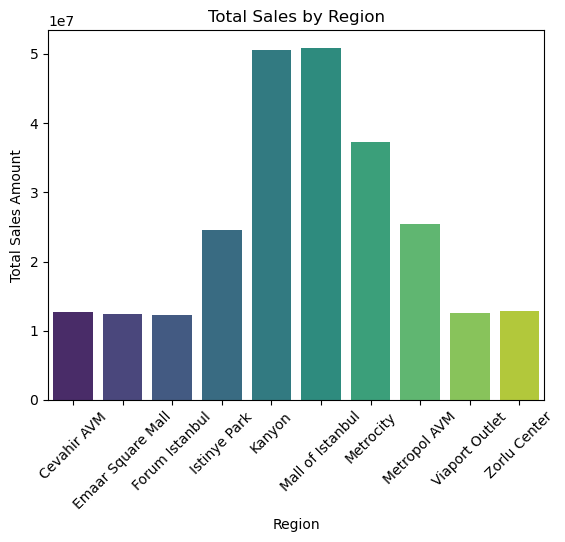

In [92]:

sns.barplot(data=total_sales_by_region, x='Region', y='Total Sales Amount', palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)

([<matplotlib.patches.Wedge at 0x22824160380>,
 [Text(1.0863066254639064, 0.1730257653449923, 'Cevahir AVM'),
  Text(0.980291080642864, 0.49902845330907336, 'Emaar Square Mall'),
  Text(0.7823709429645157, 0.7732371612932314, 'Forum Istanbul'),
  Text(0.3565124687297434, 1.0406242643914392, 'Istinye Park'),
  Text(-0.629192906499174, 0.9022839278248957, 'Kanyon'),
  Text(-1.0492076693933228, -0.3303986478274872, 'Mall of Istanbul'),
  Text(-0.17993380426082423, -1.085183775258471, 'Metrocity'),
  Text(0.63794157501842, -0.8961197168141196, 'Metropol AVM'),
  Text(0.9763523286613479, -0.5066913560714881, 'Viaport Outlet'),
  Text(1.0857479978601634, -0.17649726667188662, 'Zorlu Center')],
 [Text(0.5925308866166762, 0.09437769018817761, '5.0%'),
  Text(0.5347042258051985, 0.27219733816858543, '4.9%'),
  Text(0.426747787071554, 0.4217657243417625, '4.9%'),
  Text(0.19446134657986, 0.5676132351226032, '9.8%'),
  Text(-0.34319613081773126, 0.49215486972267036, '20.1%'),
  Text(-0.5722950923

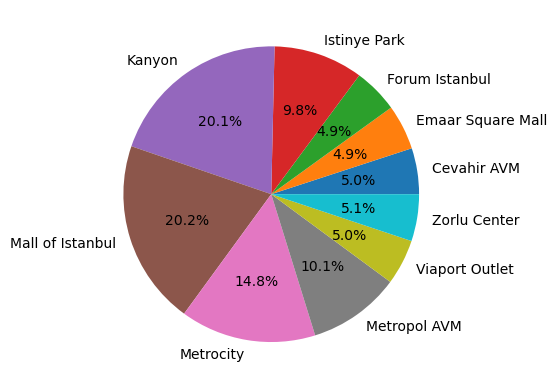

In [98]:
plt.pie(total_sales_by_region['Total Sales Amount'], labels=total_sales_by_region['Region'], autopct='%1.1f%%')

In [100]:
 total_sales_by_region.sort_values(by='Total Sales Amount', ascending=False)

,Region,Total Sales Amount
5,Mall of Istanbul,50872481.68
4,Kanyon,50554231.10
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
3,Istinye Park,24618827.68
9,Zorlu Center,12901053.82
0,Cevahir AVM,12645138.20
8,Viaport Outlet,12521339.72
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24


In [114]:
total_sales_by_region_category = df.groupby(['shopping_mall', 'category'])['total_sales'].sum().reset_index()

total_sales_by_region_category.rename(columns={'shopping_mall': 'Region', 'category': 'Product Category', 'total_sales': 'Total Sales Amount'}, inplace=True)


In [116]:
total_sales_by_region_category.head(10)

,Region,Product Category,Total Sales Amount
0,Cevahir AVM,Books,44541.00
1,Cevahir AVM,Clothing,5706321.28
2,Cevahir AVM,Cosmetics,321214.00
3,Cevahir AVM,Food & Beverage,44010.45
4,Cevahir AVM,Shoes,3243918.85
5,Cevahir AVM,Souvenir,29723.82
6,Cevahir AVM,Technology,3051300.00
7,Cevahir AVM,Toys,204108.80
8,Emaar Square Mall,Books,41995.80
9,Emaar Square Mall,Clothing,5590490.40


In [122]:
pivot_df = total_sales_by_region_category.pivot(index='Region', columns='Product Category', values='Total Sales Amount').fillna(0)

<Axes: xlabel='Region'>

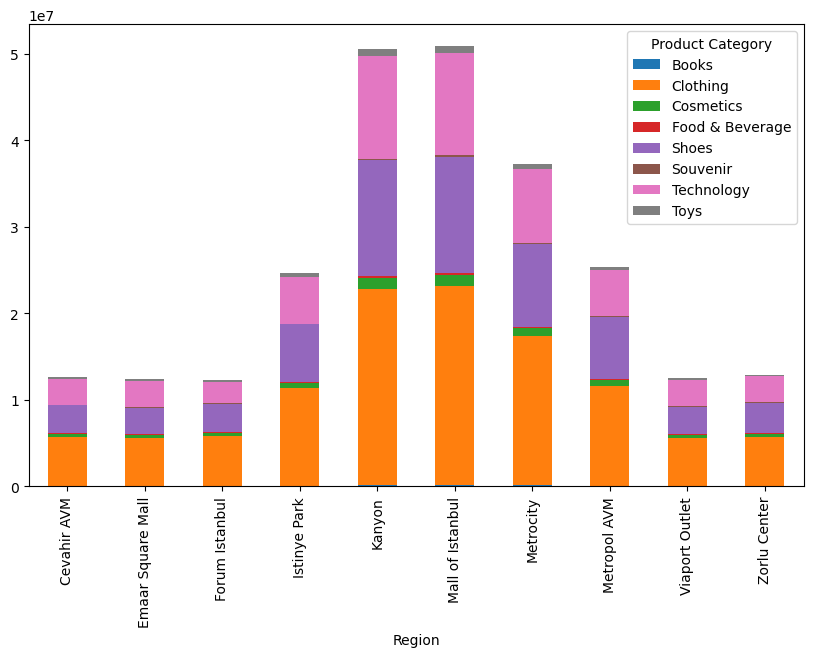

In [124]:
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

<Axes: xlabel='Region', ylabel='Total Sales Amount'>

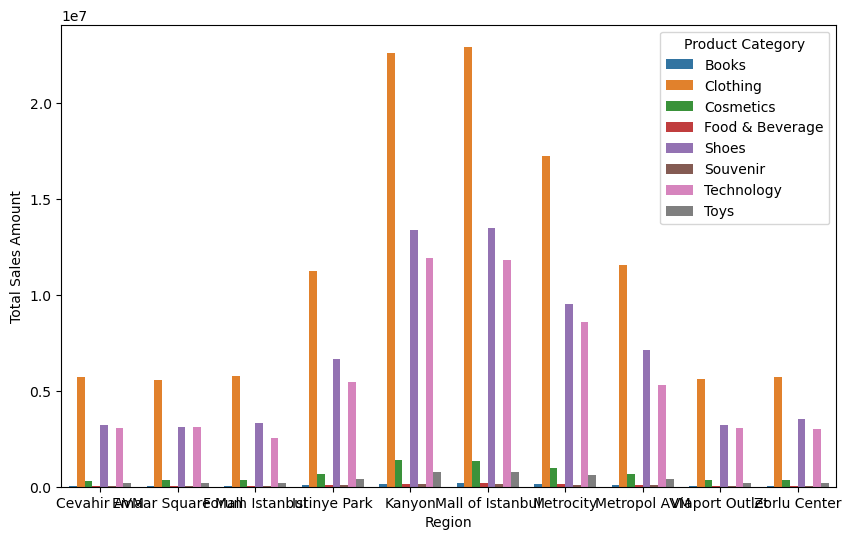

In [130]:
plt.figure(figsize=(10, 6))
sns.barplot(data=total_sales_by_region_category, x='Region', y='Total Sales Amount', hue='Product Category')